In [1]:
#imports

import numpy as np
import pandas as pd
import scipy as sp
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import covariance
import seaborn as sb

#models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model algorithms
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as tts
from sklearn.cross_validation import train_test_split as tts_cv

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data
rawData = pd.read_csv('ENB2012_data.csv', header=1)
rawData.head()

,COMPACT,S_AREA,W_AREA,R_AREA,HEIGHT,ORIENT,G_AREA,G_DIST,H_LOAD,C_LOAD
0,0.74,686.0,245.0,220.5,3.5,4.0,0.0,0.0,6.01,10.94
1,0.74,686.0,245.0,220.5,3.5,5.0,0.0,0.0,6.04,11.17
2,0.74,686.0,245.0,220.5,3.5,3.0,0.0,0.0,6.05,11.19
3,0.74,686.0,245.0,220.5,3.5,2.0,0.0,0.0,6.07,10.90
4,0.71,710.5,269.5,220.5,3.5,4.0,0.0,0.0,6.37,11.29


In [3]:
WD = rawData
WD.describe()
    ##WD.info()

,COMPACT,S_AREA,W_AREA,R_AREA,HEIGHT,ORIENT,G_AREA,G_DIST,H_LOAD,C_LOAD
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


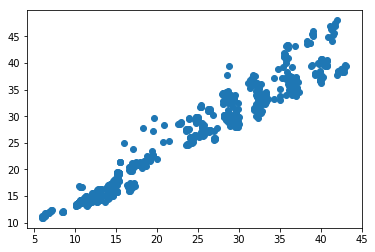

In [4]:
x = WD['H_LOAD']
y = WD['C_LOAD']
plt.scatter(x,y)
plt.show()

              COMPACT        S_AREA        W_AREA        R_AREA        HEIGHT  \
COMPACT  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
S_AREA  -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
W_AREA  -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
R_AREA  -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
HEIGHT   8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
ORIENT   4.892645e-18 -1.052852e-17  0.000000e+00  2.200022e-18  0.000000e+00   
G_AREA  -1.457325e-16  8.624572e-17 -3.825468e-17  8.960565e-16 -1.830394e-16   
G_DIST   2.349150e-17 -2.346189e-17  0.000000e+00 -6.347817e-18  0.000000e+00   
H_LOAD   6.222722e-01 -6.581202e-01  4.556712e-01 -8.618283e-01  8.894307e-01   
C_LOAD   6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

               ORIENT        G_AREA        G_DIST    H_LOAD    C_LOAD  
COMPACT  4.892645e-18 -1.457325e-16 

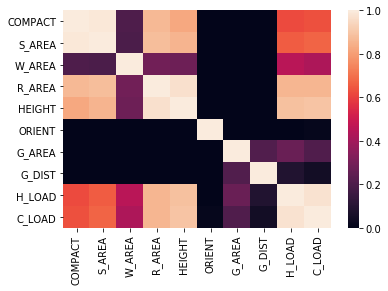

In [5]:
corrMat = WD.corr()
sb.heatmap(abs(corrMat))
print(corrMat)

In [6]:
#features
features = WD.drop(columns=['S_AREA', 'R_AREA', 'H_LOAD', 'C_LOAD'])
    ## -S_AREA, -R_AREA
features = features[:768]

#dependent variable
DVar1 = WD['H_LOAD']
DVar1 = DVar1[:768]
DVar2 = WD['C_LOAD']
DVar2 = DVar2[:768]

In [7]:
print(DVar2)

0      10.94
1      11.17
2      11.19
3      10.90
4      11.29
5      11.27
6      11.72
7      11.67
8      11.73
9      12.05
10     11.93
11     11.74
12     12.23
13     12.40
14     12.14
15     12.40
16     12.08
17     12.22
18     12.04
19     12.07
20     13.21
21     13.20
22     13.53
23     13.36
24     13.57
25     13.36
26     13.72
27     13.65
28     13.43
29     13.48
       ...  
738    37.41
739    39.67
740    39.70
741    39.48
742    40.47
743    39.85
744    40.36
745    40.63
746    39.55
747    39.48
748    44.87
749    47.01
750    46.44
751    44.18
752    46.23
753    45.29
754    45.59
755    46.94
756    47.59
757    48.03
758    37.70
759    38.23
760    38.56
761    38.81
762    38.35
763    39.07
764    38.84
765    38.33
766    39.56
767    39.41
Name: C_LOAD, Length: 768, dtype: float64


In [8]:
WD.groupby(['COMPACT']).count()

,S_AREA,W_AREA,R_AREA,HEIGHT,ORIENT,G_AREA,G_DIST,H_LOAD,C_LOAD
COMPACT,,,,,,,,,
0.62,64,64,64,64,64,64,64,64,64
0.64,64,64,64,64,64,64,64,64,64
0.66,64,64,64,64,64,64,64,64,64
0.69,64,64,64,64,64,64,64,64,64
0.71,64,64,64,64,64,64,64,64,64
0.74,64,64,64,64,64,64,64,64,64
0.76,64,64,64,64,64,64,64,64,64
0.79,64,64,64,64,64,64,64,64,64
0.82,64,64,64,64,64,64,64,64,64


In [9]:
WD.groupby(['S_AREA']).count()

,COMPACT,W_AREA,R_AREA,HEIGHT,ORIENT,G_AREA,G_DIST,H_LOAD,C_LOAD
S_AREA,,,,,,,,,
514.5,64,64,64,64,64,64,64,64,64
563.5,64,64,64,64,64,64,64,64,64
588.0,64,64,64,64,64,64,64,64,64
612.5,64,64,64,64,64,64,64,64,64
637.0,64,64,64,64,64,64,64,64,64
661.5,64,64,64,64,64,64,64,64,64
686.0,64,64,64,64,64,64,64,64,64
710.5,64,64,64,64,64,64,64,64,64
735.0,64,64,64,64,64,64,64,64,64


In [10]:
WD.groupby(['W_AREA', 'R_AREA']).count()

COMPACT  S_AREA  HEIGHT  ORIENT  G_AREA  G_DIST  H_LOAD  C_LOAD
W_AREA R_AREA                                                                 
245.0  220.50       64      64      64      64      64      64      64      64
269.5  220.50       64      64      64      64      64      64      64      64
294.0  110.25       64      64      64      64      64      64      64      64
       147.00       64      64      64      64      64      64      64      64
       220.50       64      64      64      64      64      64      64      64
318.5  122.50       64      64      64      64      64      64      64      64
       147.00       64      64      64      64      64      64      64      64
       220.50       64      64      64      64      64      64      64      64
343.0  147.00       64      64      64      64      64      64      64      64
       220.50       64      64      64      64      64      64      64      64
367.5  220.50       64      64      64      64      64      64      64      64
416.5  122.50       64      64      64      64      64      64      64      64

In [11]:
WD.groupby(['ORIENT', 'HEIGHT']).count()

COMPACT  S_AREA  W_AREA  R_AREA  G_AREA  G_DIST  H_LOAD  C_LOAD
ORIENT HEIGHT                                                                 
2.0    3.5          96      96      96      96      96      96      96      96
       7.0          96      96      96      96      96      96      96      96
3.0    3.5          96      96      96      96      96      96      96      96
       7.0          96      96      96      96      96      96      96      96
4.0    3.5          96      96      96      96      96      96      96      96
       7.0          96      96      96      96      96      96      96      96
5.0    3.5          96      96      96      96      96      96      96      96
       7.0          96      96      96      96      96      96      96      96

In [12]:
WD.groupby(['G_DIST', 'G_AREA']).count()

COMPACT  S_AREA  W_AREA  R_AREA  HEIGHT  ORIENT  H_LOAD  C_LOAD
G_DIST G_AREA                                                                 
0.0    0.00         48      48      48      48      48      48      48      48
1.0    0.10         48      48      48      48      48      48      48      48
       0.25         48      48      48      48      48      48      48      48
       0.40         48      48      48      48      48      48      48      48
2.0    0.10         48      48      48      48      48      48      48      48
       0.25         48      48      48      48      48      48      48      48
       0.40         48      48      48      48      48      48      48      48
3.0    0.10         48      48      48      48      48      48      48      48
       0.25         48      48      48      48      48      48      48      48
       0.40         48      48      48      48      48      48      48      48
4.0    0.10         48      48      48      48      48      48      48      48
       0.25         48      48      48      48      48      48      48      48
       0.40         48      48      48      48      48      48      48      48
5.0    0.10         48      48      48      48      48      48      48      48
       0.25         48      48      48      48      48      48      48      48
       0.40         48      48      48      48      48      48      48      48

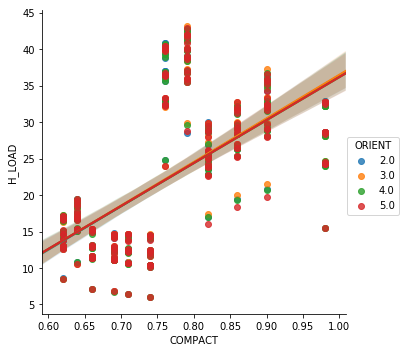

In [13]:
sb.lmplot('COMPACT', 'H_LOAD', data=WD, hue='ORIENT')

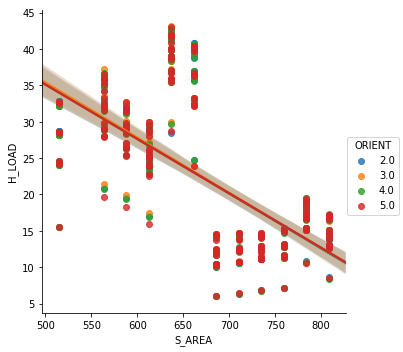

In [14]:
sb.lmplot('S_AREA', 'H_LOAD', data=WD, hue='ORIENT')

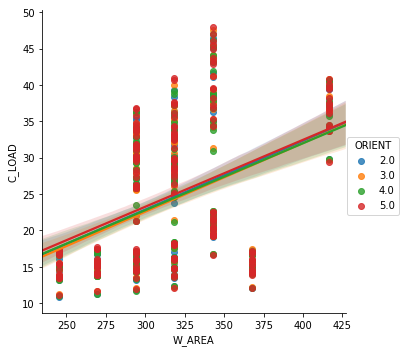

In [15]:
sb.lmplot('W_AREA', 'C_LOAD', data=WD, hue='ORIENT')

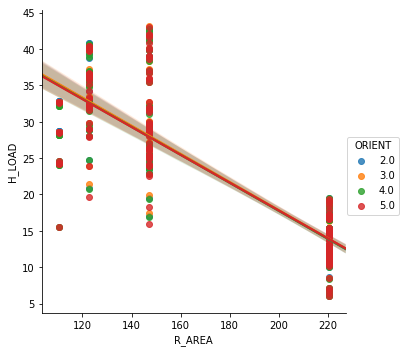

In [16]:
sb.lmplot('R_AREA', 'H_LOAD', data=WD, hue='ORIENT')

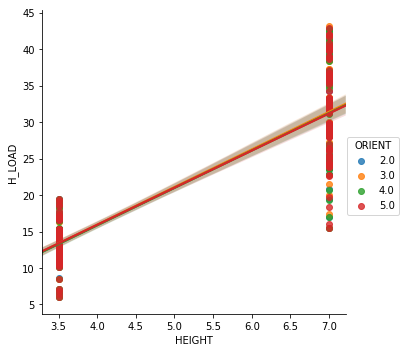

In [17]:
sb.lmplot('HEIGHT', 'H_LOAD', data=WD, hue='ORIENT')

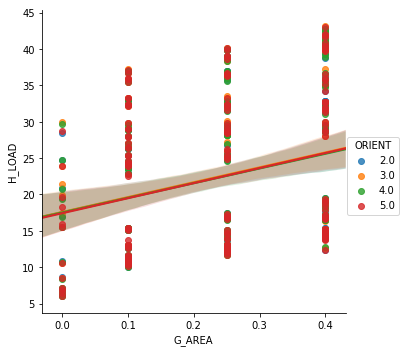

In [18]:
sb.lmplot('G_AREA', 'H_LOAD', data=WD, hue='ORIENT')

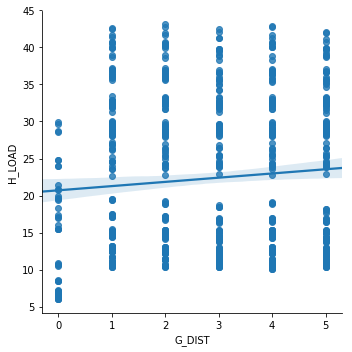

In [19]:
sb.lmplot('G_DIST', 'H_LOAD', data=WD)

In [20]:
#Model Data
x_train, x_test, y_train, y_test = tts(features, DVar1, test_size=0.25, random_state=257)

In [21]:
x_train, x_test, y_train, y_test = tts_cv(x_train, y_train)
x_train.shape, x_test.shape

((432, 6), (144, 6))

In [22]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [23]:
#SVR
modelSVR.fit(x_train,y_train)
print(cross_val_score(modelSVR, x_train, y_train))
modelSVR.score(x_train,y_train)

[0.76063389 0.74128328 0.72969881]


0.85696426614181

In [24]:
#RandomForest
modelRF.fit(x_train,y_train)
print(cross_val_score(modelRF, x_train, y_train))
modelRF.score(x_train,y_train)

[0.9898033  0.99531958 0.99664915]


0.9994836620712688

In [25]:
#LinearRegression
modelLR.fit(x_train,y_train)
print(cross_val_score(modelLR, x_train, y_train))
modelLR.score(x_train,y_train)

[0.91807912 0.91753256 0.90701182]


0.9178647208090485

In [26]:
predictions = modelRF.predict(x_test)
predRsquared = r2_score(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.997
RMSE: 0.526
